# **Assignment 2 - KNN Coding**
## Author: Jake Brulato
## Wednesday 5:30 - 8:15 : Chakra

You are provided with the "glass.csv" dataset, which contains information about various 
types of glass. Each row represents a different type of glass, and the columns represent 
different features of the glass samples. The last column denotes the type of glass, which 
is the target variable.

Task Description: 
A colab notebook "knn_classifier_base_model.ipynb” is given to you which contains the 
base KNN model. Your objectives are:

- a. Tune the model to achieve an accuracy above 70%. (Please make sure the model is not 
overfit) 
- b. For each step in the model tuning process, provide detailed explanations using 
Markdown to justify your decisions. (preprocessing and tuning) 
- c. Plot a cross validation accuracy for 10 values of k and provide inference. 

Submission Requirements: Submit a colab Notebook 
"knn_classifier_tuned_model_<your_name>.ipynb"  
Submission Guidelines: Utilize Markdown to provide explanations and reasoning for 
each step in the colab Notebook. 
 

### **Import Packages**

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_18914/101333711.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### **Load in the Glass CSV**

In [2]:
#load data
df = pd.read_csv('glass-2.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### **Check if there is nulls in any of the columns and drop them**
- Part of the preprocessing is to check the values and whether if there are nulls in the data.
- Fortunatly there aren't any but to be sure, I dropped them just in case.

In [3]:
print(df.isnull().sum())
df = df.dropna()
df.info()
df

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### **Describe the data to get an idea of the distributions for each variable**
- We use the describe function to get an idea of the distribution of each variable, see how much and the overall averages are.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


### **Create a Correlation Matrix**
- Creating a matrix to see how much influence each variable has to each other.
- Helps determine how many features and what features are best if you were looking for specifics.

In [5]:
# Check the correlation.
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


### **Specify your dependent variable and predictors/features**

In [33]:
#Separate out features and dependent variable.
X = pd.DataFrame(df,columns=df.columns[:-1])
X.head()
y=df['Type']


### **Standardize the X values**
- The variables if ran would only have around a .68 accuracy which doesn't meet our threshold of .70. 
- By Scaling the data with a Standard Scaler, it will help to balance the impact of all variables on the distance calculation and can help to improve the performance of the algorithm.

In [47]:
#Lets standardise the Values of X
std = StandardScaler()
X = std.fit_transform(X)
X

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

### **Split into Test and Train**
- We keep the test size of how it is originally and the state.
- 20% of the original data will be allocated to the test while the rest is for the train.
- Increasing the training could help model performance

In [56]:
#Split the dataset into test and train
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2,random_state=45)


### **Initialize the K and create an array for each accuracy**
- Make an array to for 10 k iterations and the same.
- Then create the same to put accuarcies based on the length of the first array.

In [57]:
# Initialize k
neighbors = np.arange(1,11)
train_accuracy = np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

# KNN = KNeighborsClassifier()
# params = dict(n_neighbors = neighbors )

# grid = GridSearchCV(estimator= KNN,
#                     param_grid=params)

# grid.fit(X_train, y_train)

# print(grid.best_score_)
# print(grid.best_params_)

### **Iterate through based on the length of the array**
- Based on the length on the array, with each spot being the amount of K in the classifer.
- Create the classifer and set it to the number k based on neighbors.
- Fit the data to the train and test that was split.
- Put the accuracy score created in each spot based on train and test.

In [58]:
for i,k in enumerate(neighbors):

    # Instantiate classifiers
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

### **Plotted Accuracy**
- Plot the K with the number of neighbors and their accuracies
- We see that the test and train have no indication of overfitting, but there seems to be a slight case when it goes past 7.
- It best to look at the highest test accuracy to determine which amount of K would be best.
- The only two that pass the threshold of 70% would be 1 and 2, but if we fit it to 1, there could be a case of overfitting so 2 would be better to fit the criteria.
- Anything past 2 wouldn't work.

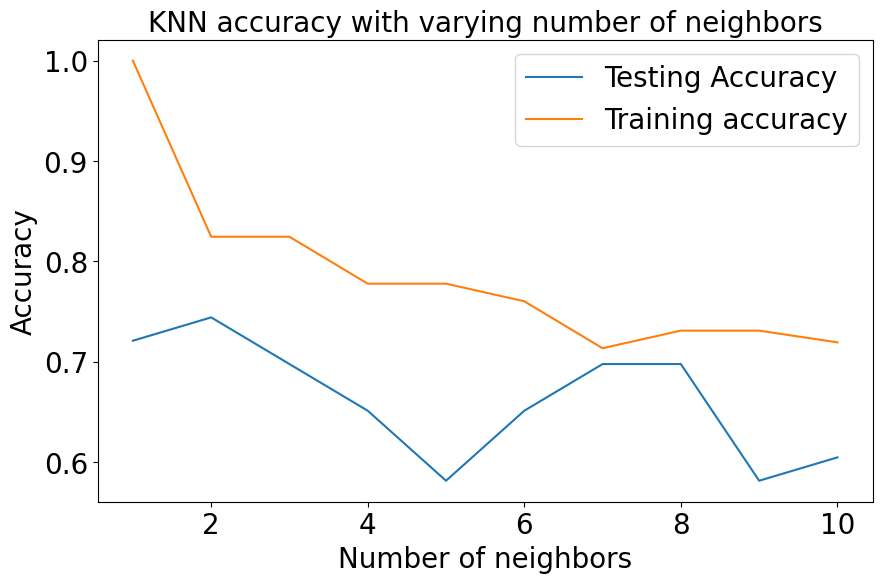

In [59]:
# Plot accuracy per k
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### **Based on the plot, We pick K = 2 because it is the highest K**

In [66]:
 # Instantiate classifiers
knn = KNeighborsClassifier(n_neighbors=2)

#Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

### **The Tuned Accuracy Score**

In [67]:
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.7441860465116279